# ANALYSIS OF EBAY CLOTHING COLOR TRENDS

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### IMPORTING DATA AND EXPLORATORY ANALYSIS

In [2]:
data = pd.read_csv(r'C:\Users\mohit\Desktop\Data_Science\Auriga\data\data.csv')

In [3]:
data.head()

,date,img,color
0,2013-08-29 01:09:42,4539,"(0.27450980392156865, 0.22745098039215686, 0.2..."
1,2013-08-29 01:09:42,5728,"(0.1411764705882353, 0.1450980392156863, 0.168..."
2,2013-08-29 01:09:42,9193,"(0.14901960784313725, 0.1450980392156863, 0.16..."
3,2013-08-29 01:09:42,3550,"(0.1411764705882353, 0.1450980392156863, 0.168..."
4,2013-08-29 01:09:42,5827,"(0.4666666666666667, 0.3568627450980392, 0.419..."


In [4]:
data.describe()

,img
count,9900.000000
mean,4949.500000
std,2858.028166
min,0.000000
25%,2474.750000
50%,4949.500000
75%,7424.250000
max,9899.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 3 columns):
date     9900 non-null object
img      9900 non-null int64
color    9900 non-null object
dtypes: int64(1), object(2)
memory usage: 232.1+ KB


In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.set_index('date', inplace=True)

In [8]:
data.head()

,img,color
date,,
2013-08-29 01:09:42,4539,"(0.27450980392156865, 0.22745098039215686, 0.2..."
2013-08-29 01:09:42,5728,"(0.1411764705882353, 0.1450980392156863, 0.168..."
2013-08-29 01:09:42,9193,"(0.14901960784313725, 0.1450980392156863, 0.16..."
2013-08-29 01:09:42,3550,"(0.1411764705882353, 0.1450980392156863, 0.168..."
2013-08-29 01:09:42,5827,"(0.4666666666666667, 0.3568627450980392, 0.419..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9900 entries, 2013-08-29 01:09:42 to 2018-07-22 05:22:12
Data columns (total 2 columns):
img      9900 non-null int64
color    9900 non-null object
dtypes: int64(1), object(1)
memory usage: 232.0+ KB


In [10]:
print("Number of observations in 2018: " + str(len(data[data.index.get_level_values(0) > '2018-01-01T05:22:12.000000000'])))
print("\nNumber of observations in 2017: " + str(len(data[(data.index.get_level_values(0) < '2018-01-01T05:22:12.000000000') & (data.index.get_level_values(0) > '2017-01-01T05:22:12.000000000')])))
print("\nNumber of observations in 2016: " + str(len(data[(data.index.get_level_values(0) < '2017-01-01T05:22:12.000000000') & (data.index.get_level_values(0) > '2016-01-01T05:22:12.000000000')])))
print("\nNumber of observations in 2015: " + str(len(data[(data.index.get_level_values(0) < '2016-01-01T05:22:12.000000000') & (data.index.get_level_values(0) > '2015-01-01T05:22:12.000000000')])))
print("\nNumber of observations in 2014: " + str(len(data[(data.index.get_level_values(0) < '2015-01-01T05:22:12.000000000') & (data.index.get_level_values(0) > '2014-01-01T05:22:12.000000000')])))
print("\nNumber of observations in 2013: " + str(len(data[(data.index.get_level_values(0) < '2014-01-01T05:22:12.000000000') & (data.index.get_level_values(0) > '2013-01-01T05:22:12.000000000')])))


Number of observations in 2018: 4897

Number of observations in 2017: 2700

Number of observations in 2016: 1403

Number of observations in 2015: 600

Number of observations in 2014: 200

Number of observations in 2013: 100


#### TRANSFORMING DATA

In [11]:
s = data['color'].apply(lambda x: x.split(','))
data['R'] = s.apply(lambda x: x[0][1:])
data['G'] = s.apply(lambda x: x[1])
data['B'] = s.apply(lambda x: x[2][:-1])

In [12]:
data.head()

,img,color,R,G,B
date,,,,,
2013-08-29 01:09:42,4539,"(0.27450980392156865, 0.22745098039215686, 0.2...",0.27450980392156865,0.22745098039215686,0.2549019607843137
2013-08-29 01:09:42,5728,"(0.1411764705882353, 0.1450980392156863, 0.168...",0.1411764705882353,0.1450980392156863,0.16862745098039217
2013-08-29 01:09:42,9193,"(0.14901960784313725, 0.1450980392156863, 0.16...",0.14901960784313725,0.1450980392156863,0.16862745098039217
2013-08-29 01:09:42,3550,"(0.1411764705882353, 0.1450980392156863, 0.168...",0.1411764705882353,0.1450980392156863,0.16862745098039217
2013-08-29 01:09:42,5827,"(0.4666666666666667, 0.3568627450980392, 0.419...",0.4666666666666667,0.3568627450980392,0.4196078431372549


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9900 entries, 2013-08-29 01:09:42 to 2018-07-22 05:22:12
Data columns (total 5 columns):
img      9900 non-null int64
color    9900 non-null object
R        9900 non-null object
G        9900 non-null object
B        9900 non-null object
dtypes: int64(1), object(4)
memory usage: 784.1+ KB


In [14]:
data[['R','G','B']] = data[['R','G','B']].apply(pd.to_numeric)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9900 entries, 2013-08-29 01:09:42 to 2018-07-22 05:22:12
Data columns (total 5 columns):
img      9900 non-null int64
color    9900 non-null object
R        9900 non-null float64
G        9900 non-null float64
B        9900 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 784.1+ KB


In [16]:
data['R'] = data['R'] * 255
data['G'] = data['G'] * 255
data['B'] = data['B'] * 255

In [17]:
data.head()

,img,color,R,G,B
date,,,,,
2013-08-29 01:09:42,4539,"(0.27450980392156865, 0.22745098039215686, 0.2...",70.0,58.0,65.0
2013-08-29 01:09:42,5728,"(0.1411764705882353, 0.1450980392156863, 0.168...",36.0,37.0,43.0
2013-08-29 01:09:42,9193,"(0.14901960784313725, 0.1450980392156863, 0.16...",38.0,37.0,43.0
2013-08-29 01:09:42,3550,"(0.1411764705882353, 0.1450980392156863, 0.168...",36.0,37.0,43.0
2013-08-29 01:09:42,5827,"(0.4666666666666667, 0.3568627450980392, 0.419...",119.0,91.0,107.0


In [18]:
df = data.drop('img', 1)
df = df.drop('color', 1)
df.head()

,R,G,B
date,,,
2013-08-29 01:09:42,70.0,58.0,65.0
2013-08-29 01:09:42,36.0,37.0,43.0
2013-08-29 01:09:42,38.0,37.0,43.0
2013-08-29 01:09:42,36.0,37.0,43.0
2013-08-29 01:09:42,119.0,91.0,107.0


#### GROUPING BASED ON DATE AND PLOTTING TRENDS

In [19]:
df_newest = df.reset_index()
df_newest

,date,R,G,B
0,2013-08-29 01:09:42,70.0,58.0,65.0
1,2013-08-29 01:09:42,36.0,37.0,43.0
2,2013-08-29 01:09:42,38.0,37.0,43.0
3,2013-08-29 01:09:42,36.0,37.0,43.0
4,2013-08-29 01:09:42,119.0,91.0,107.0
5,2013-08-29 01:09:42,61.0,75.0,99.0
6,2013-08-29 01:09:42,47.0,48.0,61.0
7,2013-08-29 01:09:42,218.0,192.0,198.0
8,2013-08-29 01:09:42,211.0,208.0,218.0
9,2013-08-29 01:09:42,227.0,227.0,227.0


In [20]:
df_newest.groupby(["date"])['R','G','B'].mean()

,R,G,B
date,,,
2013-08-29 01:09:42,139.200000,129.800000,131.570000
2014-04-15 01:19:47,139.670000,129.550000,131.830000
2014-12-04 02:07:09,140.960000,130.240000,132.180000
2015-03-10 03:05:18,138.330000,128.710000,130.950000
2015-03-15 18:30:06,140.920000,131.770000,133.540000
2015-06-01 09:23:54,140.480000,133.370000,135.080000
2015-07-29 15:34:29,143.150000,130.120000,132.560000
2015-10-14 20:18:36,140.930000,131.600000,133.220000
2015-11-22 04:50:56,142.750000,133.870000,134.960000


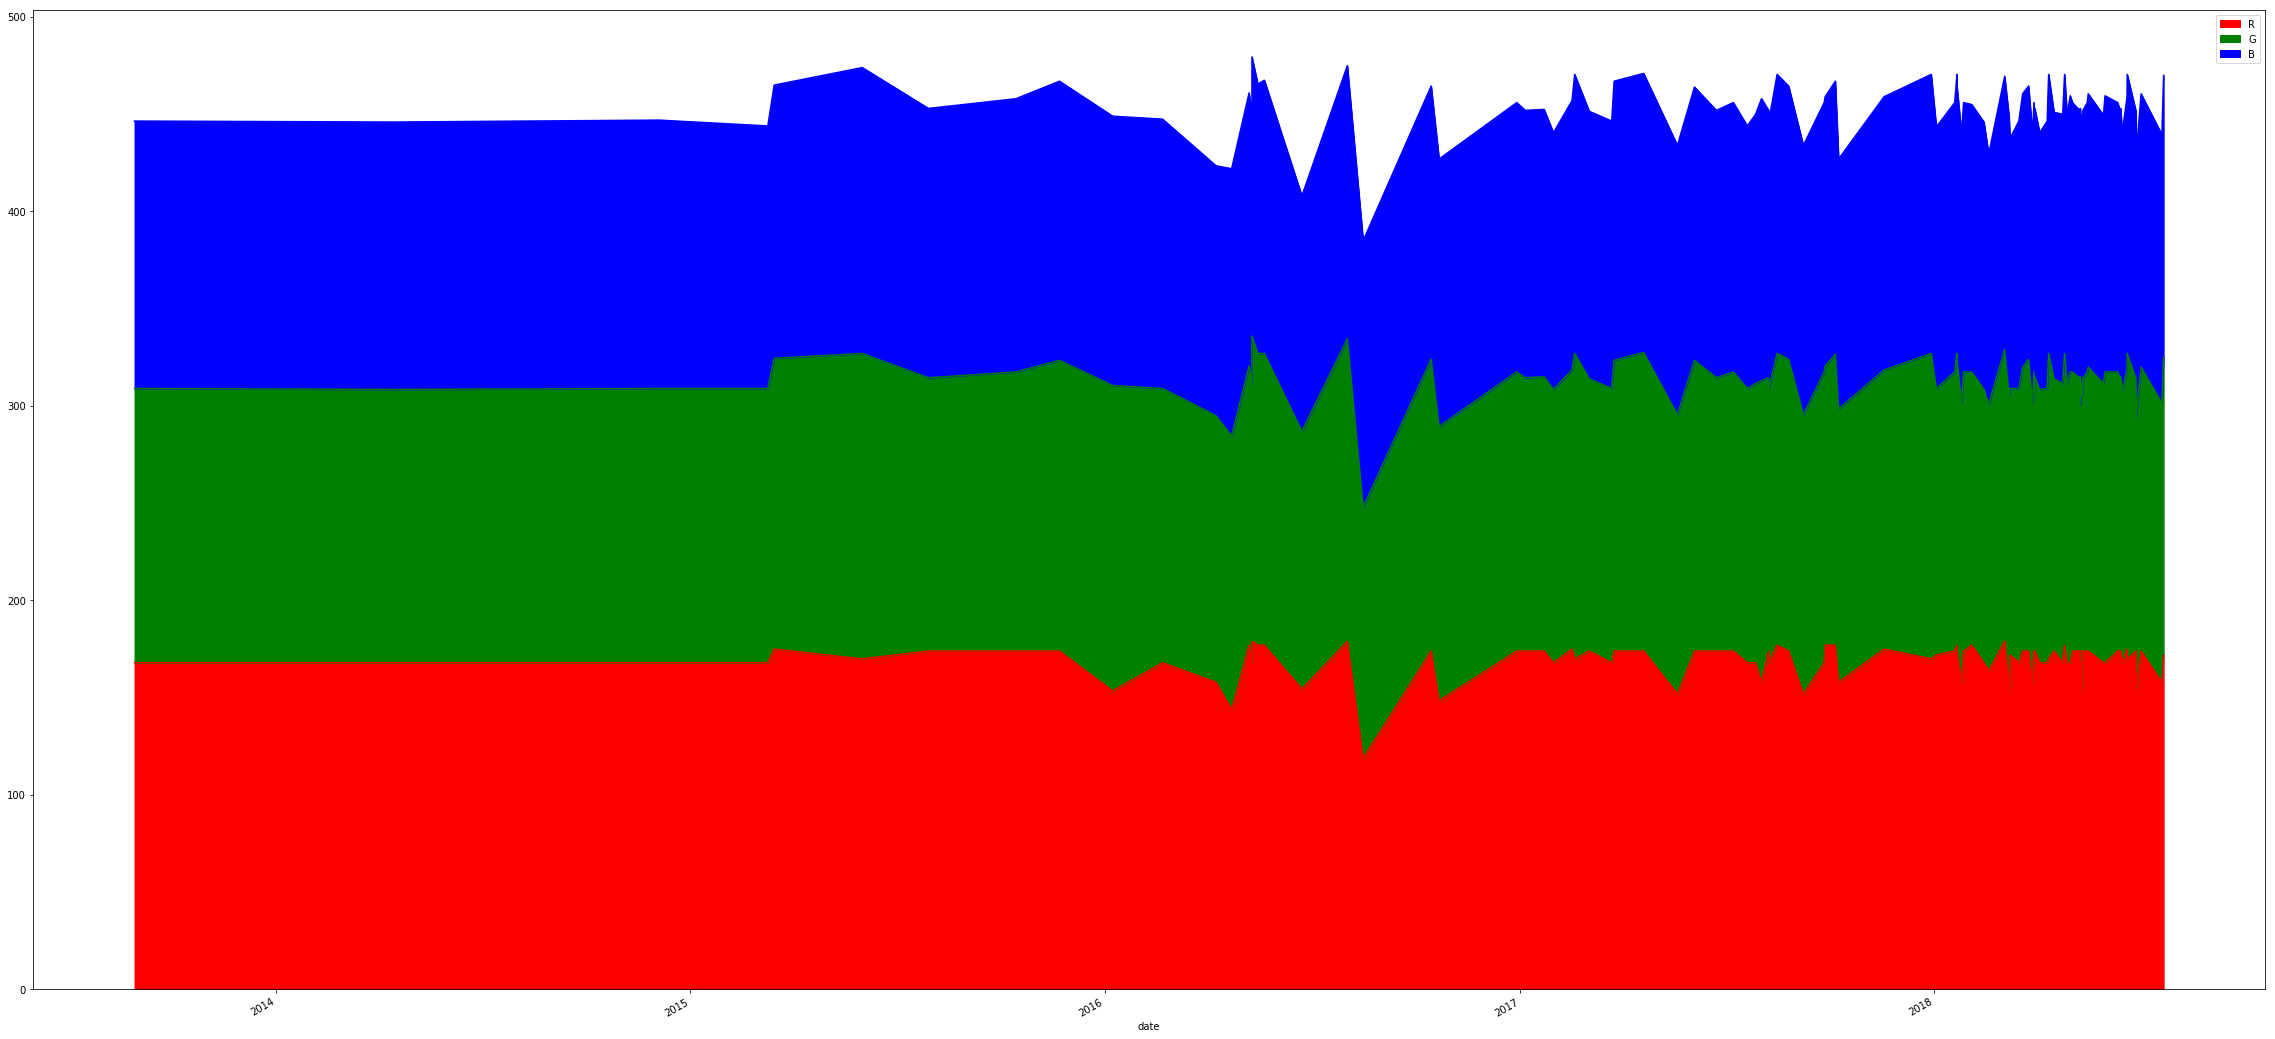

In [21]:
# PLOTTING ENTIRE DATA USING AREA PLOTS
df_newest.groupby(["date"])['R','G','B'].median().plot.area(figsize=(40,20),color=tuple(["r", "g","b"]));

In [22]:
df_18 = df_newest[df_newest['date'] > '2018-01-01T05:22:12.000000000']
df_17 = df_newest[(df_newest['date'] < '2018-01-01T05:22:12.000000000')&(df_newest['date'] > '2017-01-01T05:22:12.000000000')]
df_16 = df_newest[(df_newest['date'] < '2017-01-01T05:22:12.000000000')&(df_newest['date'] > '2016-01-01T05:22:12.000000000')]
df_15 = df_newest[(df_newest['date'] < '2016-01-01T05:22:12.000000000')&(df_newest['date'] > '2015-01-01T05:22:12.000000000')]
df_14 = df_newest[(df_newest['date'] < '2015-01-01T05:22:12.000000000')&(df_newest['date'] > '2014-01-01T05:22:12.000000000')]
df_13 = df_newest[(df_newest['date'] < '2014-01-01T05:22:12.000000000')&(df_newest['date'] > '2013-01-01T05:22:12.000000000')]


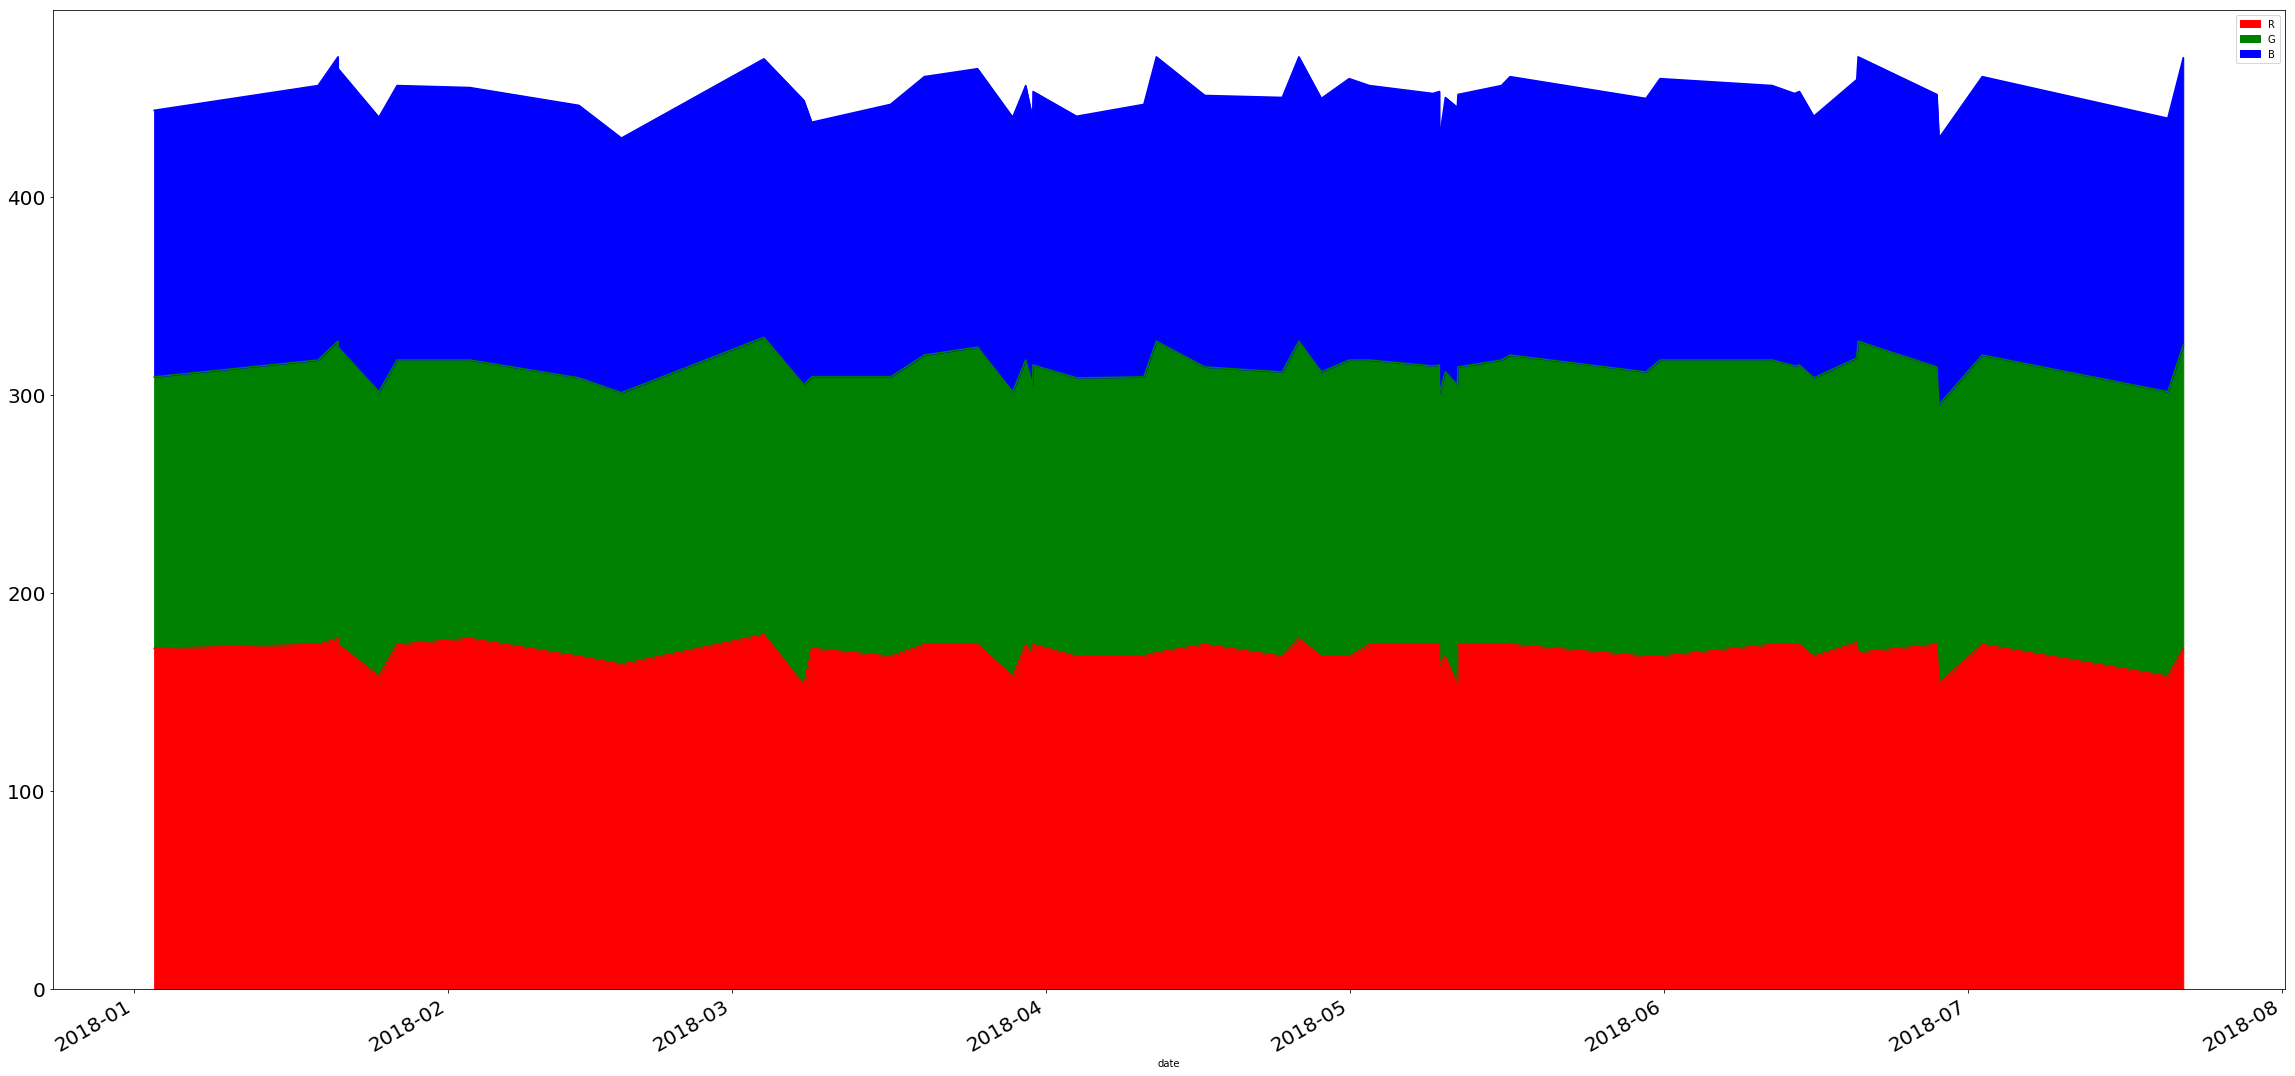

In [23]:
# PLOTTING DATA FOR 2018 USING AREA PLOTS
df_18.groupby(["date"])['R','G','B'].median().plot.area(figsize=(40,20), fontsize=20,color=tuple(["r", "g","b"]));

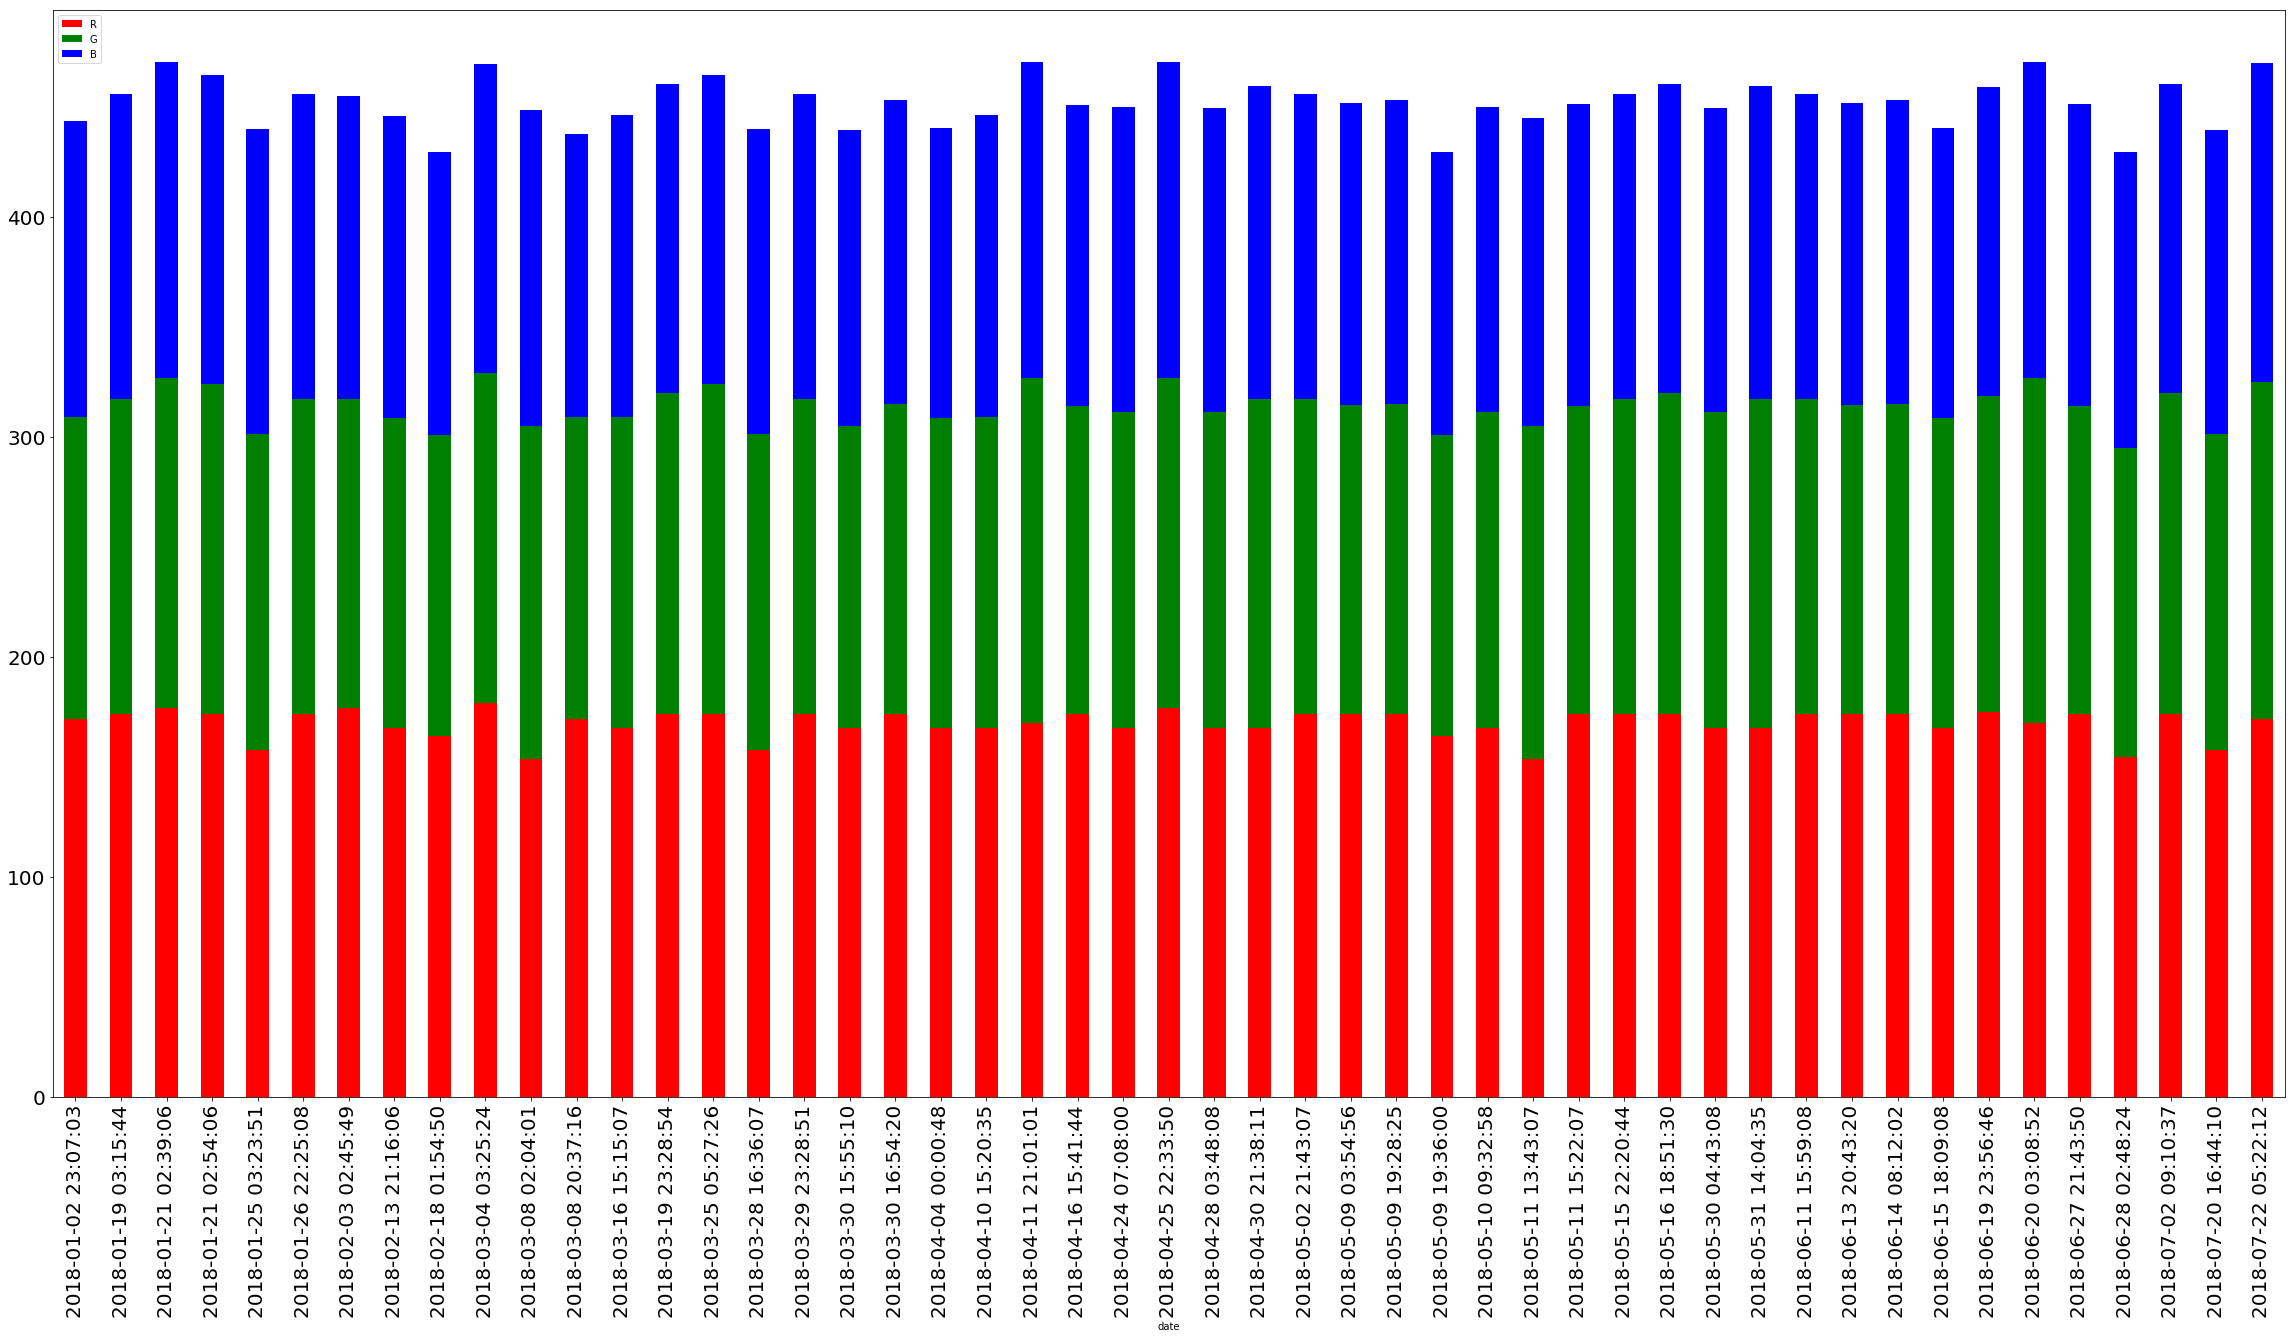

In [24]:
# PLOTTING DATA FOR 2018 USING STACKED BAR PLOTS
df_18.groupby(["date"])['R','G','B'].median().plot.bar(stacked=True,figsize=(40,20), fontsize=20,color=tuple(["r", "g","b"]));

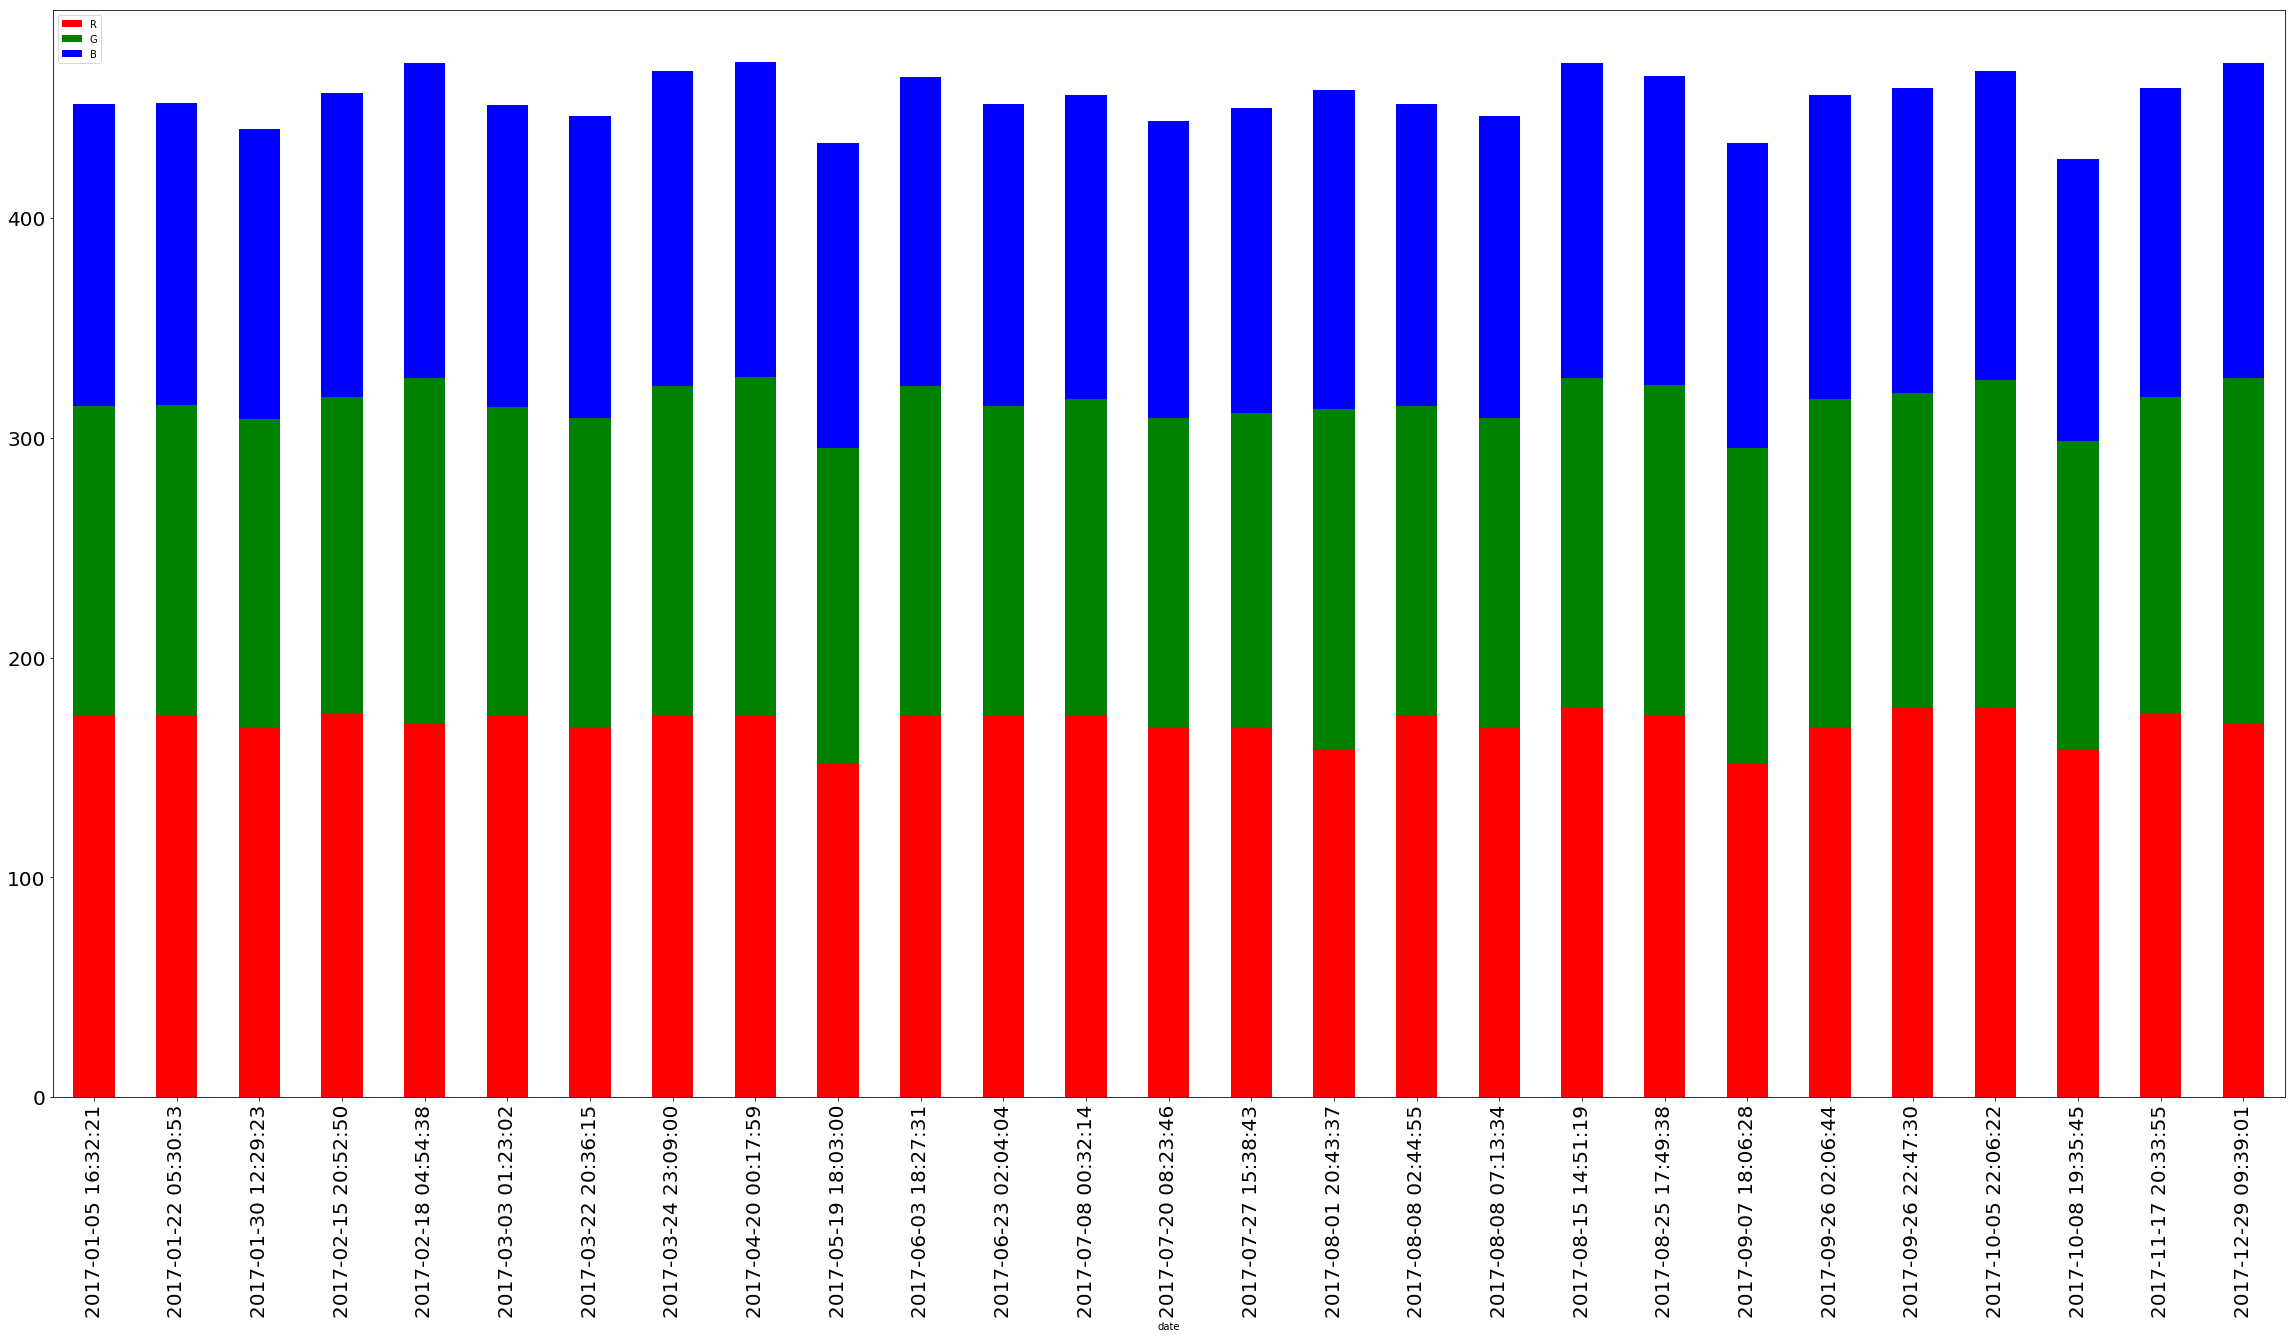

In [25]:
# PLOTTING DATA FOR 2017 USING STACKED BAR PLOTS
df_17.groupby(["date"])['R','G','B'].median().plot.bar(stacked=True,figsize=(40,20), fontsize=20,color=tuple(["r", "g","b"]));

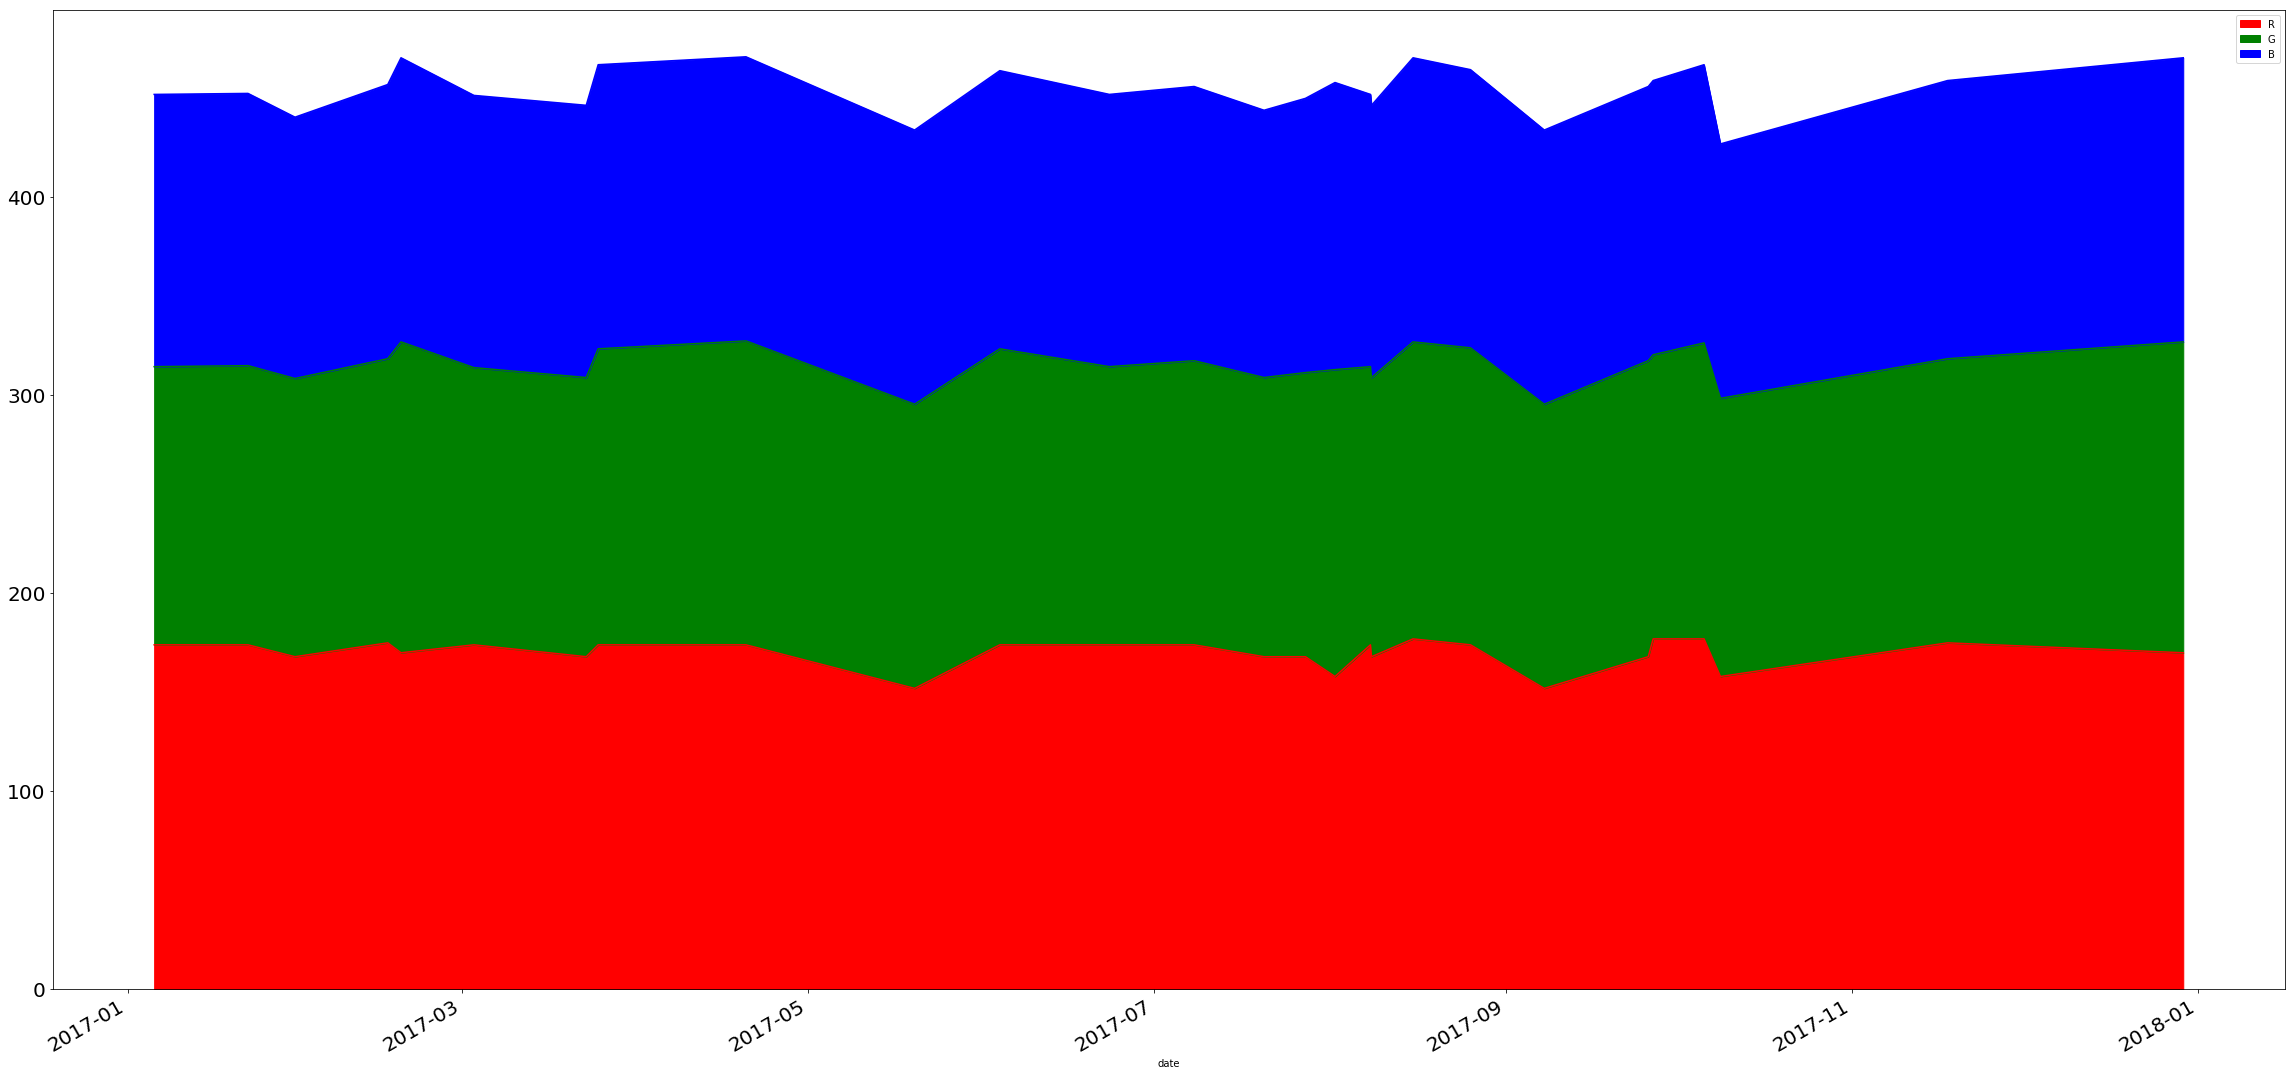

In [26]:
# PLOTTING DATA FOR 2017 USING AREA PLOTS
df_17.groupby(["date"])['R','G','B'].median().plot.area(figsize=(40,20), fontsize=20, color=tuple(["r", "g","b"]));

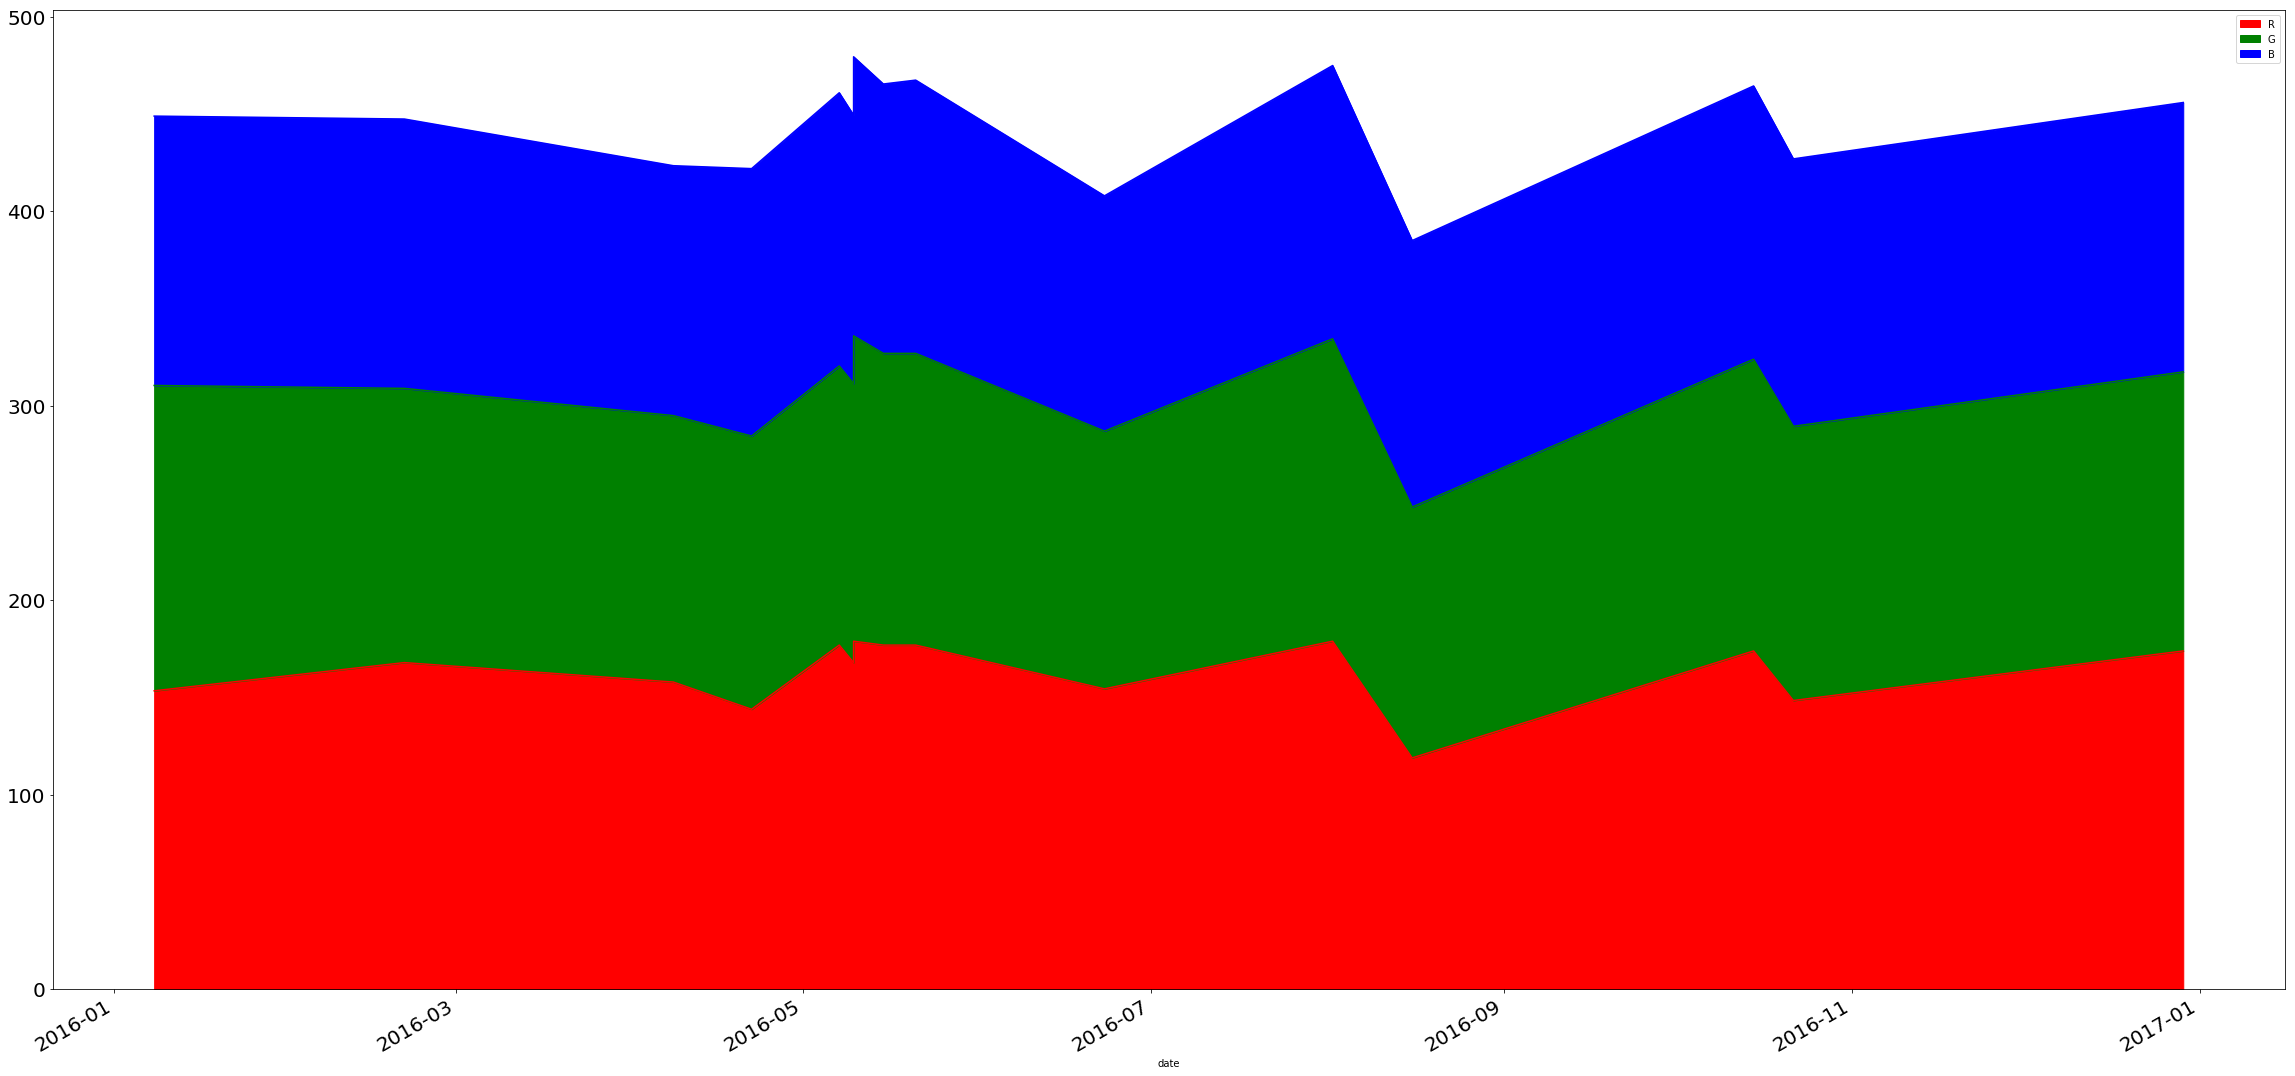

In [27]:
# PLOTTING DATA FOR 2016 USING AREA PLOTS
df_16.groupby(["date"])['R','G','B'].median().plot.area(figsize=(40,20), fontsize=20, color=tuple(["r", "g","b"]));

Text(0.5,0,'Year')

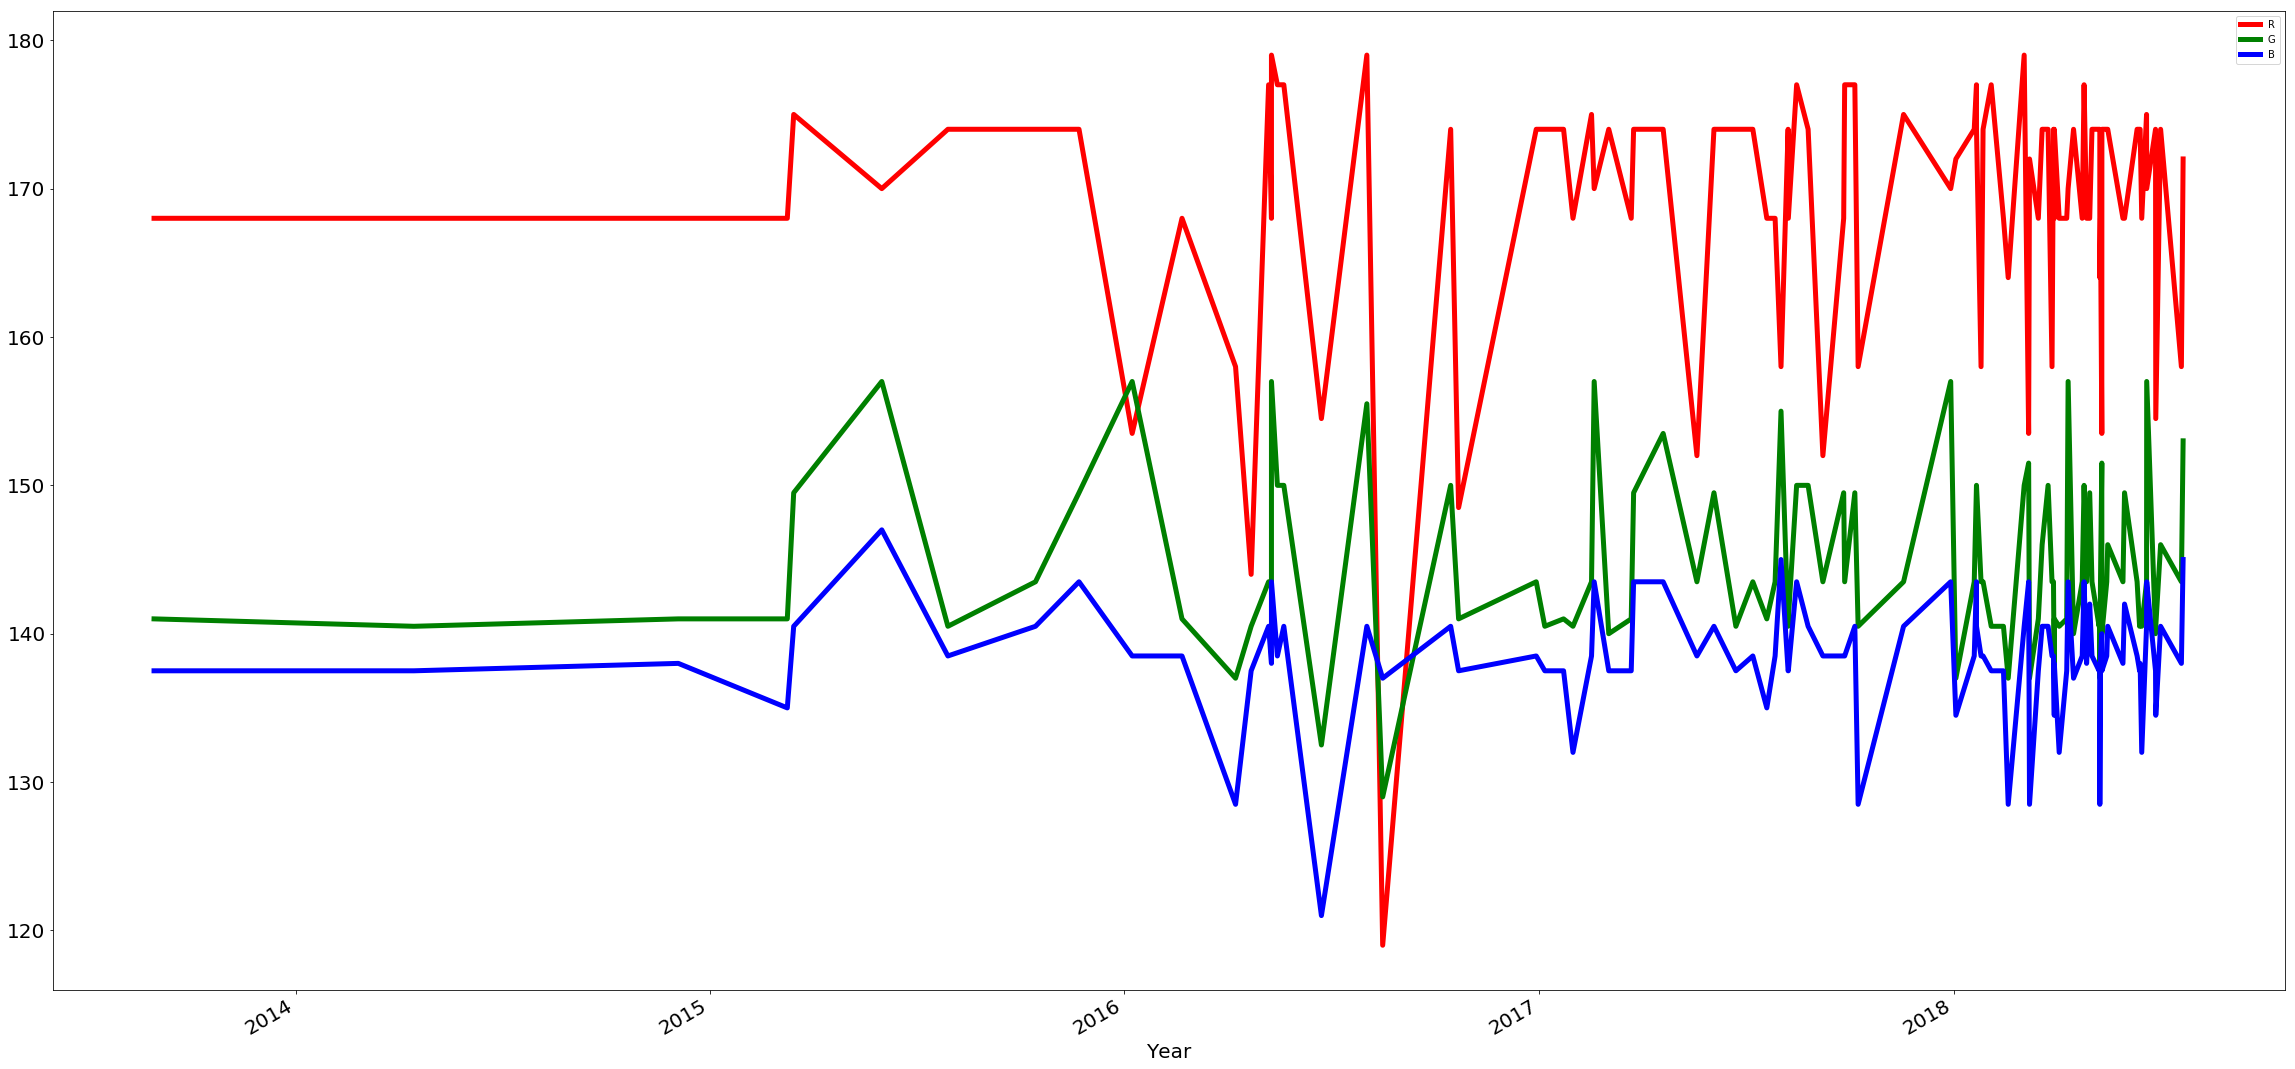

In [28]:
# PLOTTING ENTIRE DATA
df_newest.groupby(["date"])['R','G','B'].median().groupby(["date"])['R','G','B'].median().plot(figsize=(40,20), linewidth=5, fontsize=20, color=tuple(["r", "g","b"]))
plt.xlabel('Year', fontsize=20)

Text(0.5,0,'Year')

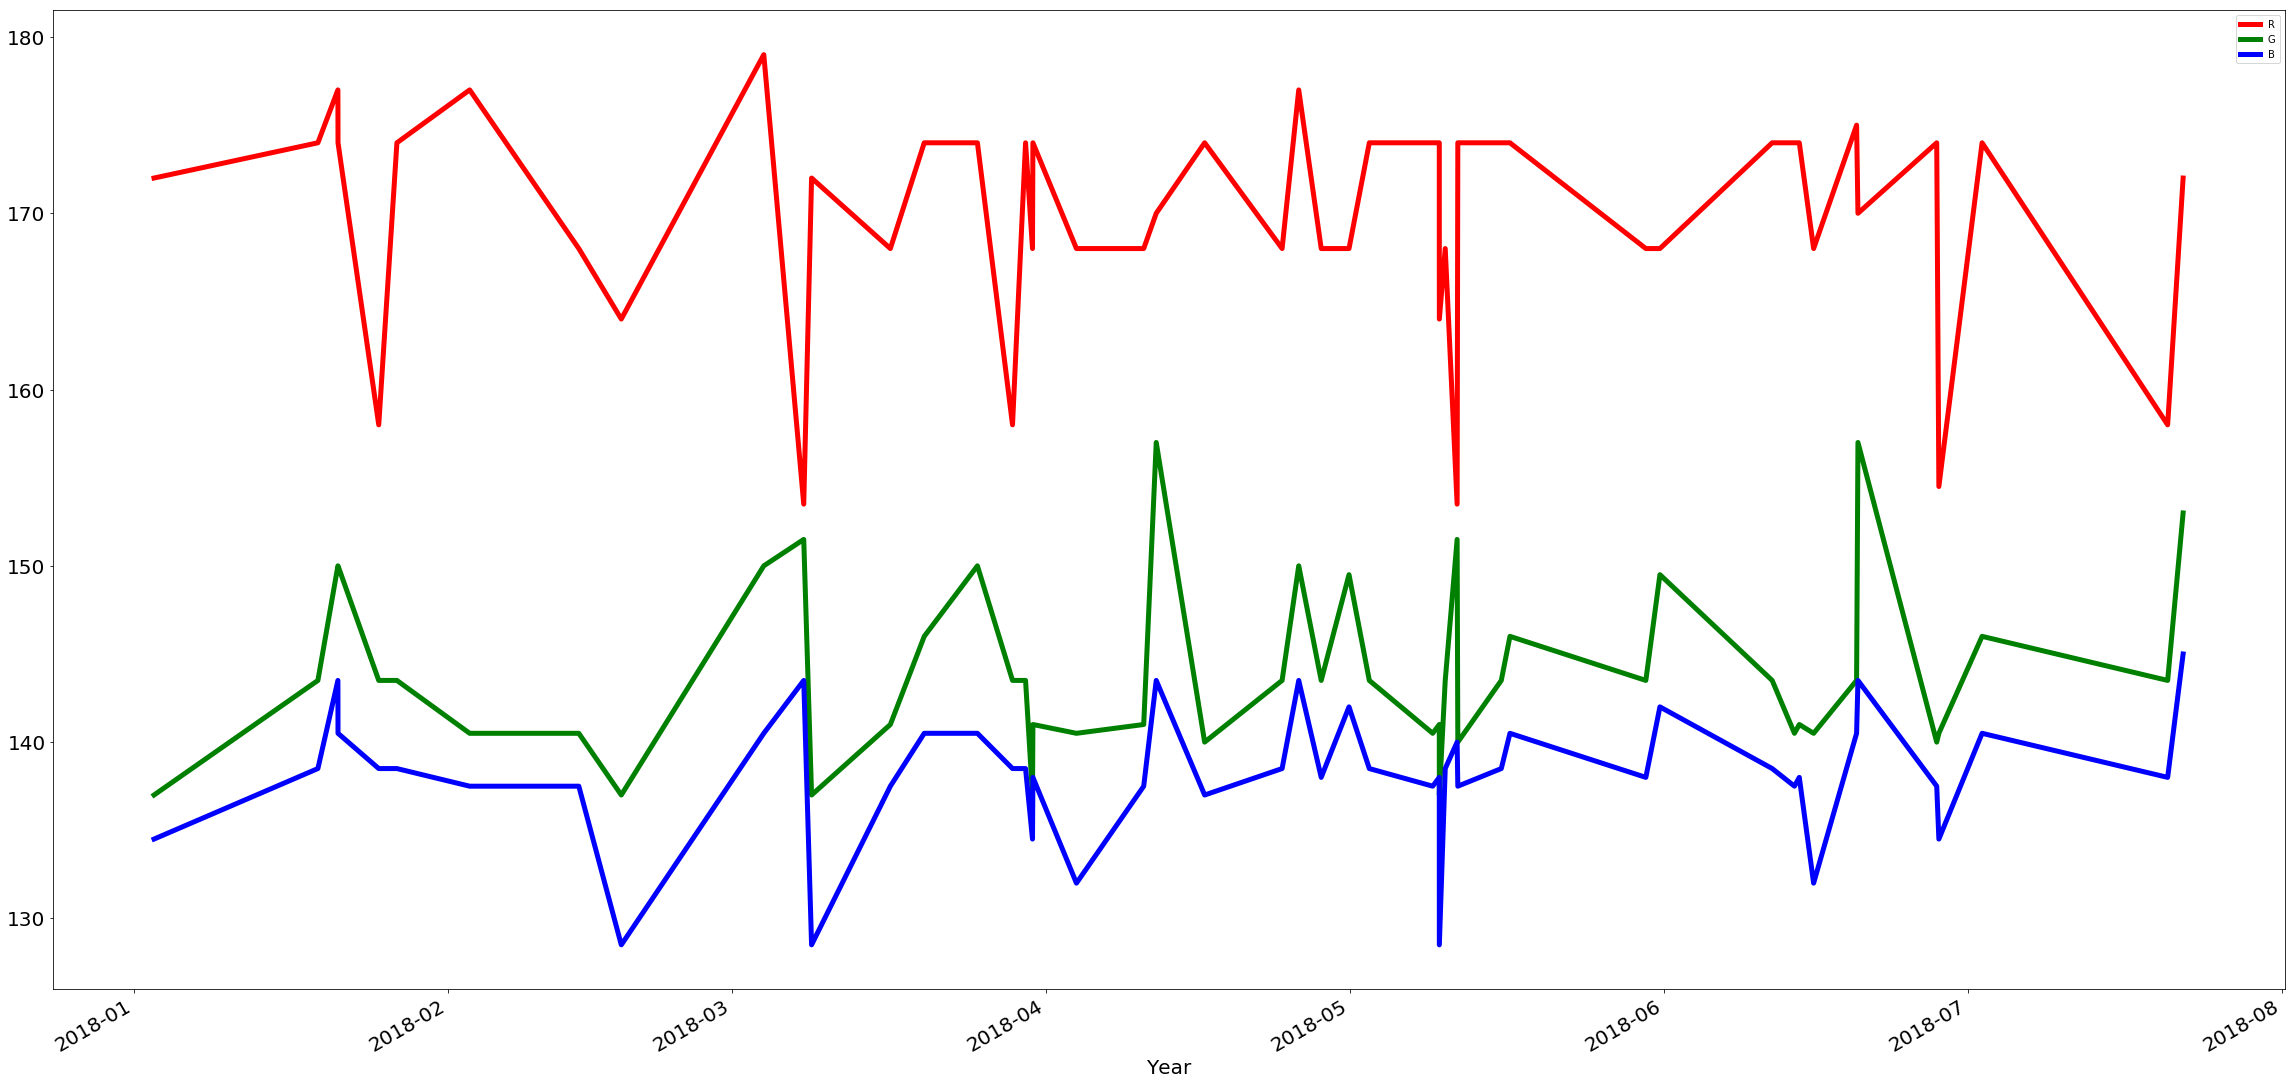

In [29]:
# PLOTTING DATA FOR 2018
df_18.groupby(["date"])['R','G','B'].median().plot(figsize=(40,20), linewidth=5, fontsize=20, color=tuple(["r", "g","b"]))
plt.xlabel('Year', fontsize=20)

Text(0.5,0,'Year')

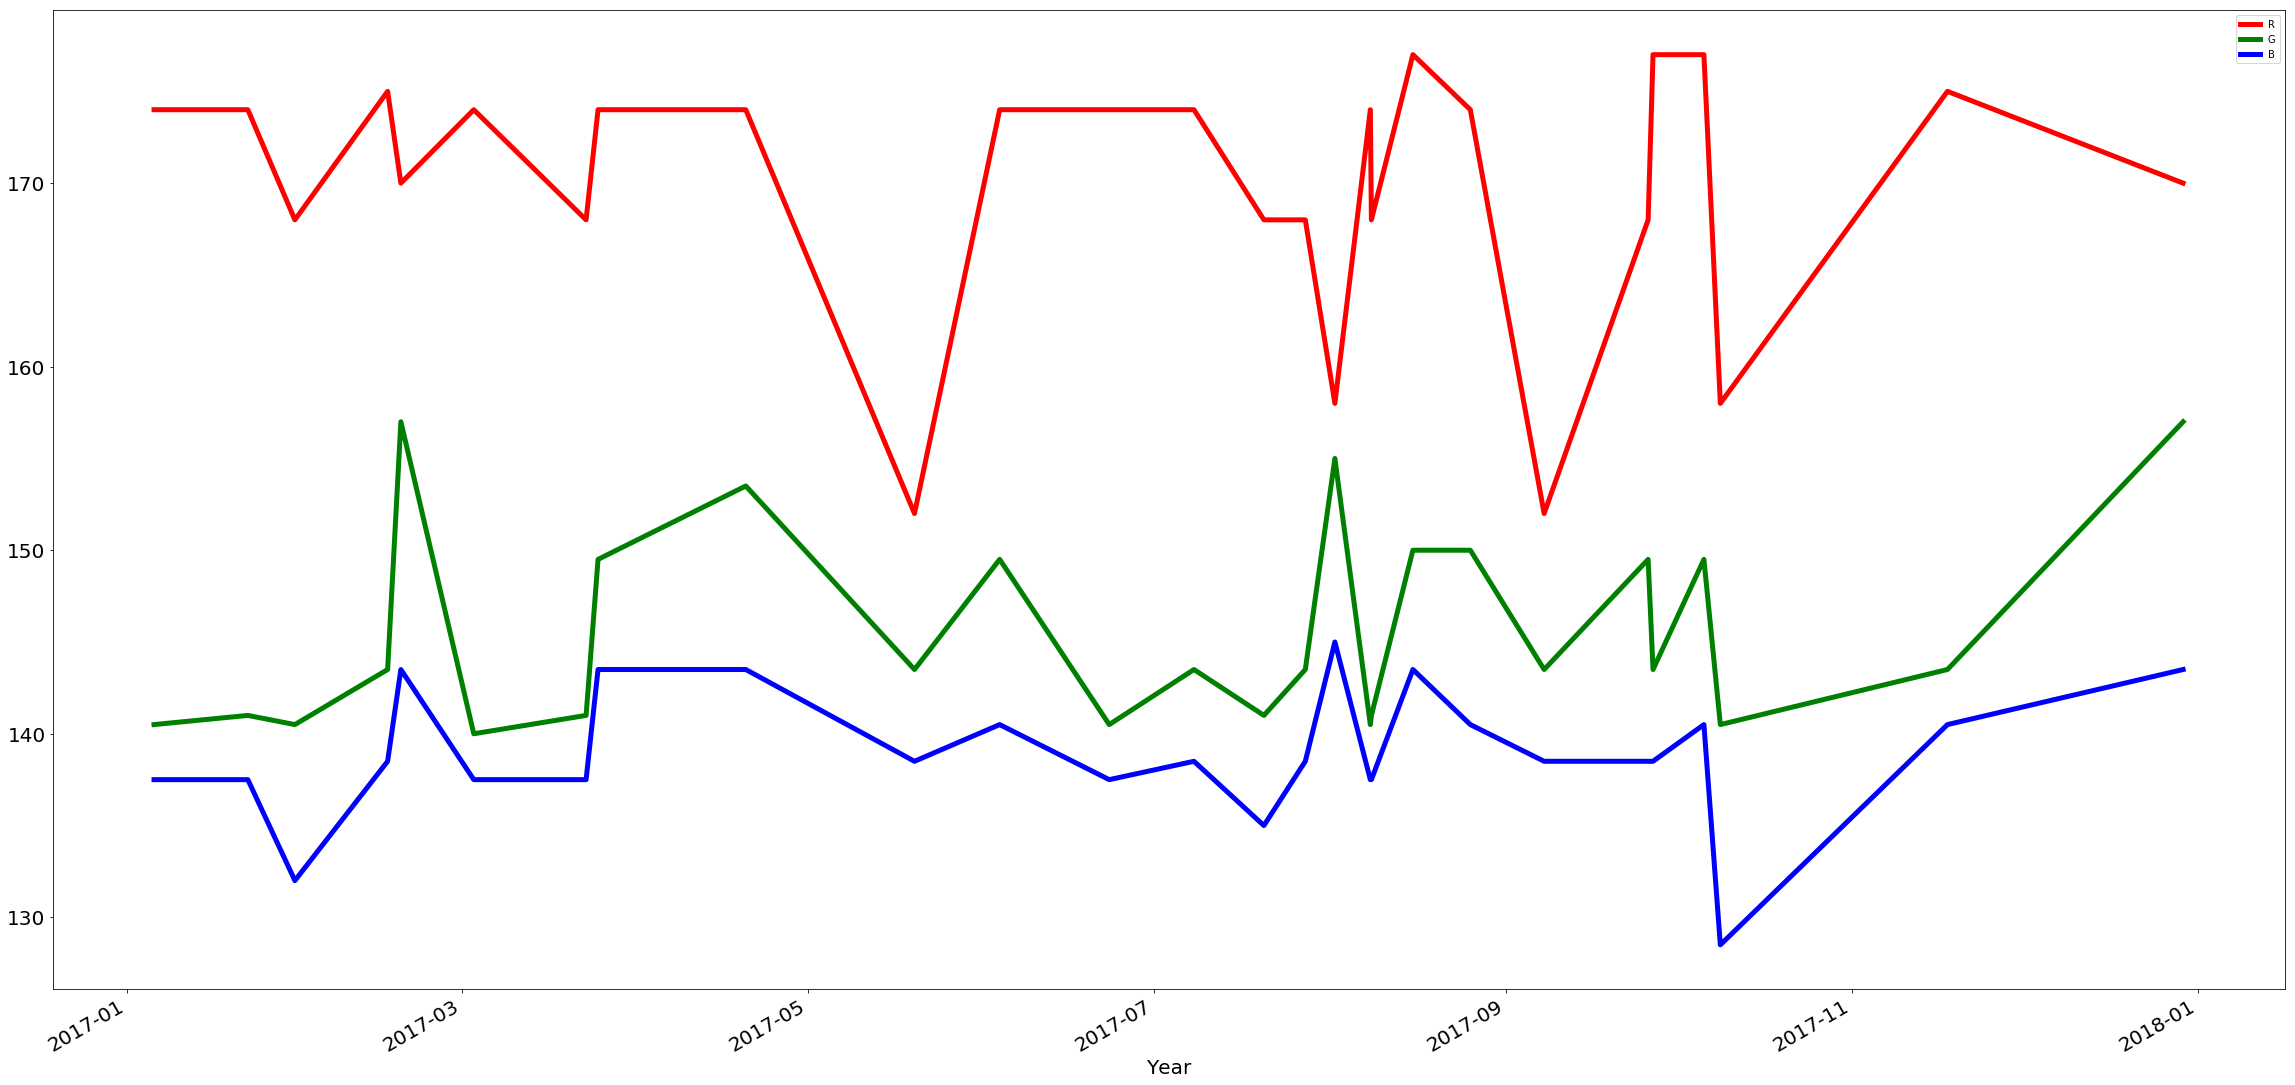

In [30]:
# PLOTTING DATA FOR 2017
df_17.groupby(["date"])['R','G','B'].median().plot(figsize=(40,20), linewidth=5, fontsize=20, color=tuple(["r", "g","b"]))
plt.xlabel('Year', fontsize=20)

Text(0.5,0,'Year')

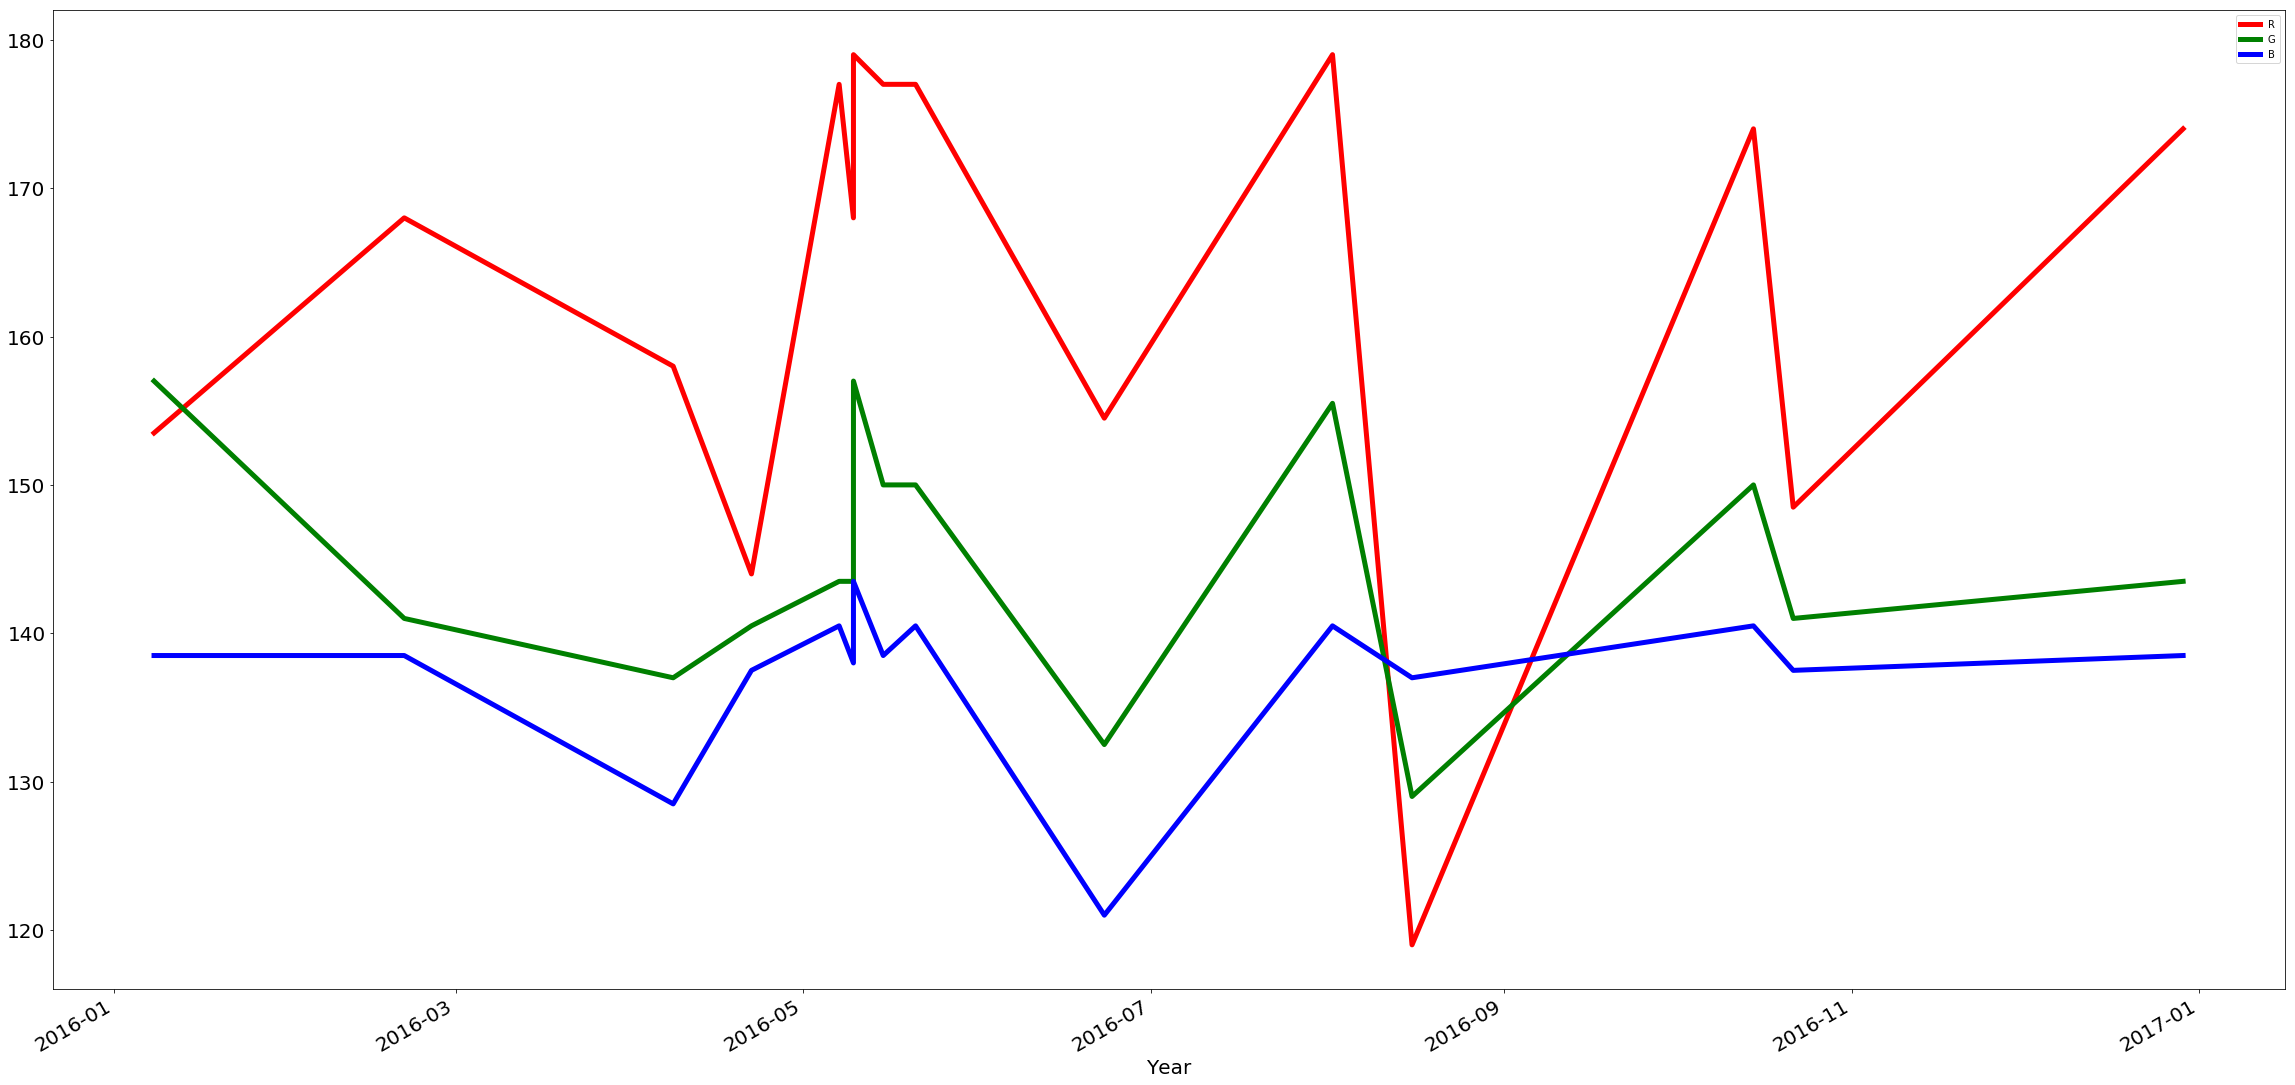

In [31]:
# PLOTTING DATA FOR 2016
df_16.groupby(["date"])['R','G','B'].median().plot(figsize=(40,20), linewidth=5, fontsize=20, color=tuple(["r", "g","b"]))
plt.xlabel('Year', fontsize=20)

Text(0.5,0,'Year')

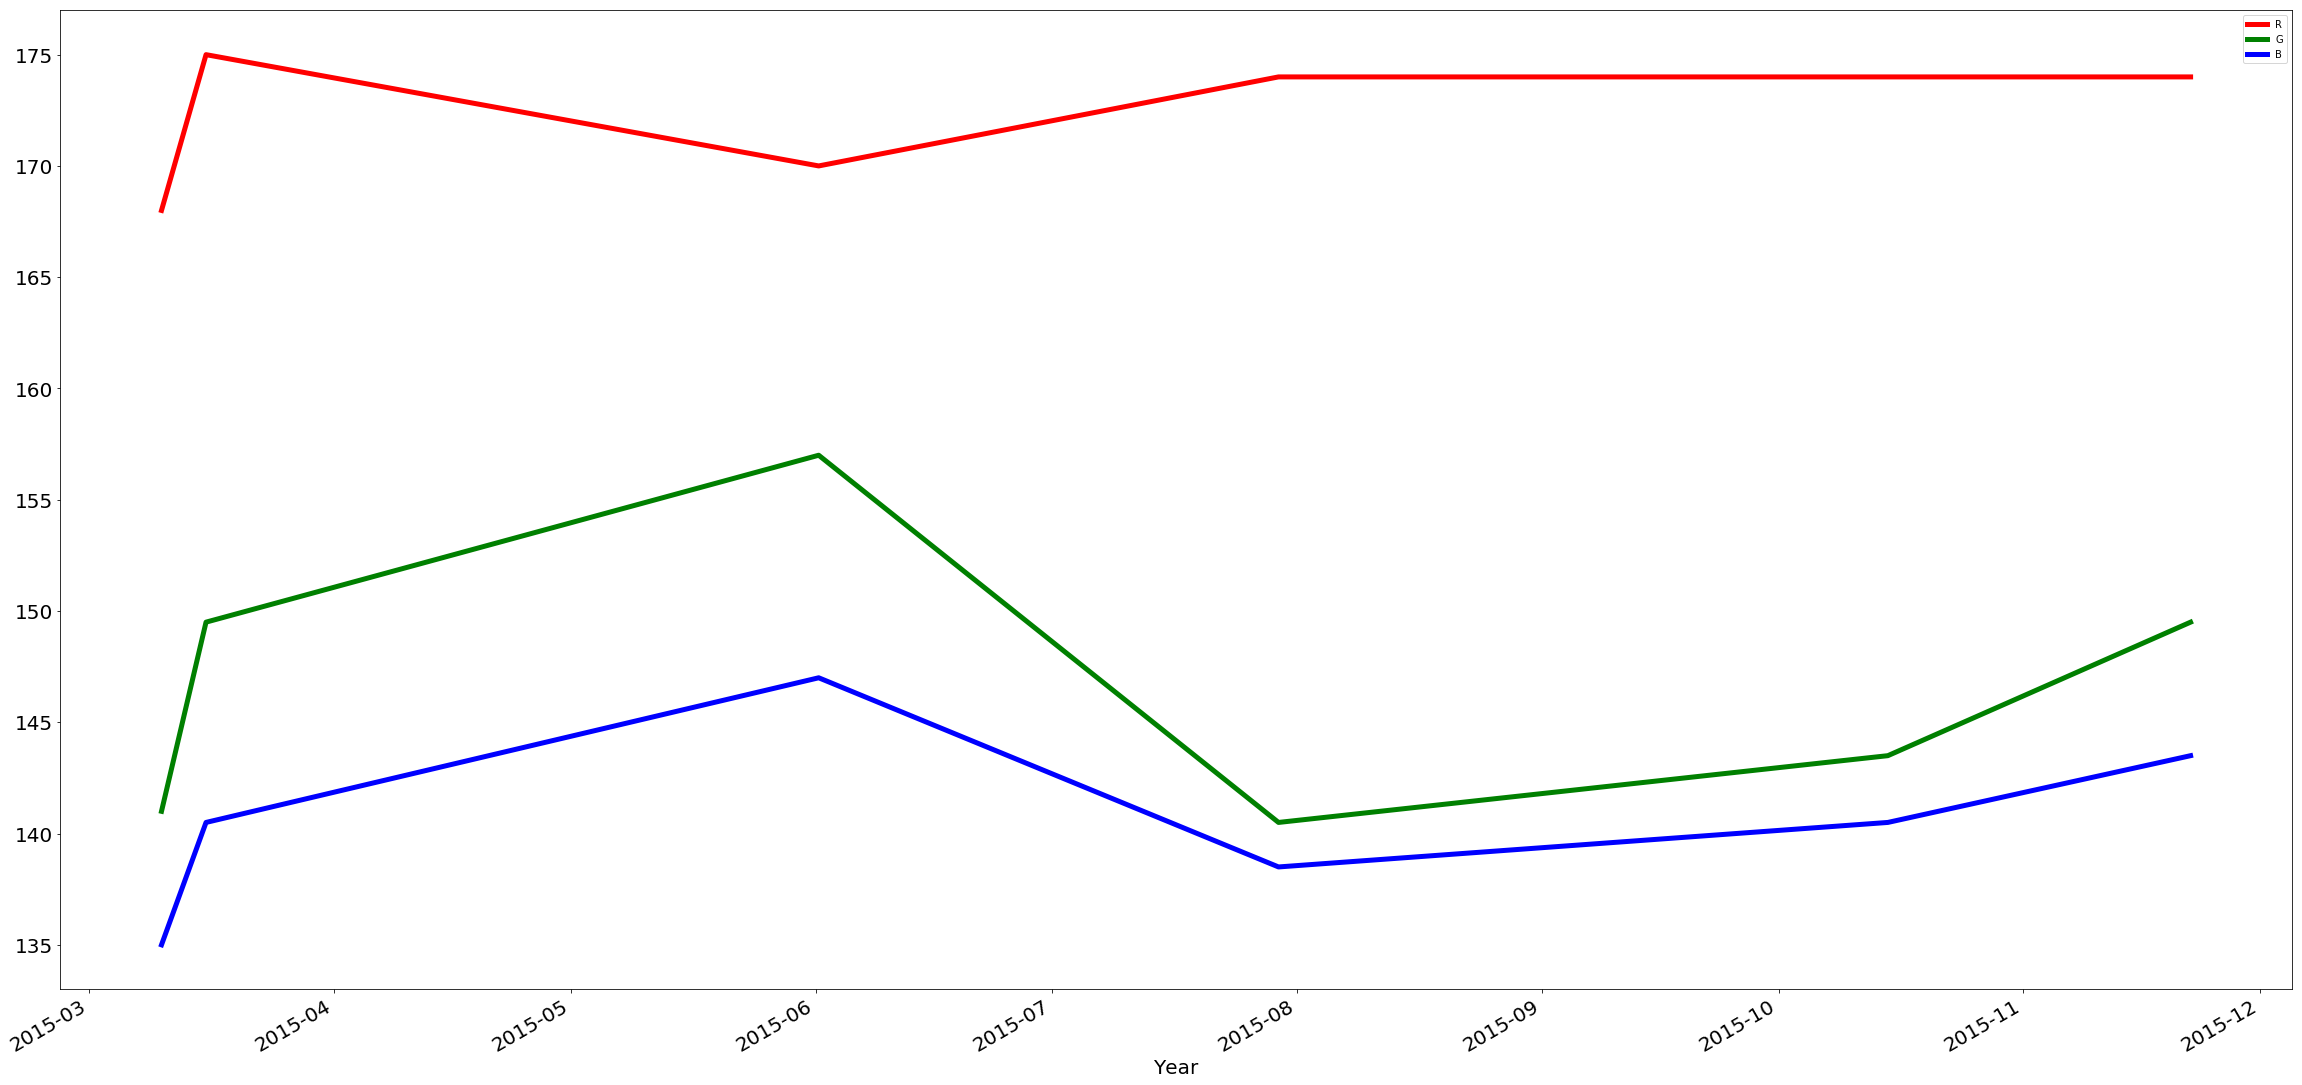

In [32]:
# PLOTTING DATA FOR 2015
df_15.groupby(["date"])['R','G','B'].median().plot(figsize=(40,20), linewidth=5, fontsize=20, color=tuple(["r", "g","b"]))
plt.xlabel('Year', fontsize=20)

### OBSERVATIONS BASED ON THE DISTRIBUTION OF COLOR DATA: 

#### NOTE: Low values of (R,B,G) represent dark colors and high values represent light colors

#### Every year the demand for dark-colored clothes (represented by low values of (R,G,B)) peaks in the months of July, September, and October. The increase in demand for dark-colored clothes during the begining Winter season is quite expected. 

#### However, the demand for red-colored clothes seem to rise during December

#### Every year the demand for light-colored clothes (represented by high values of (R,G,B)) peaks towards the months of May and June which usually marks the begining of the Summer season